In [1]:
# KNN  ( K -  Nearest Neighbors)
# 지도학습 (정답이 있는학습, 레이블을 가지고 있는 데이터, X를 넣으면 Y가 나오는)
# Lazy Model (훈련이 따로 필요없는, 모델을 별도로 구축하지 않는, clf.fit(x_train, y_train)이 필요없음)


""" step 1) 표준화시키기 ( 데이터들의 거리 정하기) either 유클리드 or 맨해튼 거리 
    step 2) K 구하기 """
    

' step 1) 표준화시키기 ( 데이터들의 거리 정하기) either 유클리드 or 맨해튼 거리 \n    step 2) K 구하기 '

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [36]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target  # 0은 setosa, 1 은 versicolor, 2은 virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
X = iris.data   # 잎 길이들
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
y = iris.target  # 꽃 종류
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  # 훈련과 테스트 비율은 7:3

In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# 정확도 구하기 
knn.score(X_test, y_test)  # 93 % ( k 가 5일때)

0.9333333333333333

In [45]:
# K 구하기 
k_range = range(1,50)
scores = {}
score_list = []

for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_prediction = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_prediction)    
    score_list.append(metrics.accuracy_score(y_test,y_prediction))

In [46]:
scores

{1: 0.9111111111111111,
 2: 0.9111111111111111,
 3: 0.9111111111111111,
 4: 0.9111111111111111,
 5: 0.9333333333333333,
 6: 0.9333333333333333,
 7: 0.9333333333333333,
 8: 0.9333333333333333,
 9: 0.9333333333333333,
 10: 0.9333333333333333,
 11: 0.9555555555555556,
 12: 0.9555555555555556,
 13: 0.9555555555555556,
 14: 0.9555555555555556,
 15: 0.9555555555555556,
 16: 0.9555555555555556,
 17: 0.9555555555555556,
 18: 0.9555555555555556,
 19: 0.9555555555555556,
 20: 0.9111111111111111,
 21: 0.9111111111111111,
 22: 0.9111111111111111,
 23: 0.9111111111111111,
 24: 0.9111111111111111,
 25: 0.9333333333333333,
 26: 0.9333333333333333,
 27: 0.9333333333333333,
 28: 0.9111111111111111,
 29: 0.9111111111111111,
 30: 0.9111111111111111,
 31: 0.9333333333333333,
 32: 0.9111111111111111,
 33: 0.9555555555555556,
 34: 0.9777777777777777,
 35: 0.9777777777777777,
 36: 0.9555555555555556,
 37: 0.9333333333333333,
 38: 0.9555555555555556,
 39: 0.9333333333333333,
 40: 0.9111111111111111,
 41: 0.91

In [47]:
score_list 

[0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111

Text(0, 0.5, 'Accuracy')

C:\Users\yuna\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yuna\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


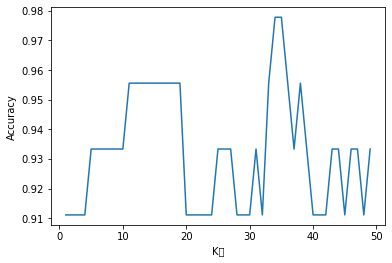

In [49]:
plt.plot(k_range, score_list )
plt.xlabel("K값")
plt.ylabel("Accuracy")

In [ ]:
# k가 35일 때 가장 정확도가 높다! 

In [3]:
""" 머신러닝은  Training // Test 셋으로 나누고 
   딥러닝은 주로 Training // Validation // Test 셋으로 나눈다"""

' 머신러닝은  Training // Test 셋으로 나누고 \n   딥러닝은 주로 Training // Validation // Test 셋으로 나눈다'

In [4]:
# K겹 교차 검증 (K- fold corss validation
#  데이터 셋을 k개로 나눈 후, 하나만 test 셋으로 K-1 을 학습용 셋으로 나뉜후 K 수 만큼 running !
# 결과물도 K개 나올것임. K개의 결과물들의 평균값이 K겹 교차 검증방식을 활용한 모델의 성능

In [5]:
#  데이터 전처리 
""" 1)  결측치 처리 (평균값// 최빈값// 지우기) 
    2)  원-핫 인코딩 ex) red:001// green: 100 
       from sklearn.preprocessig import OneHotEncoder  
    3) 데이터 바인딩     
    4) Feature scaling 
        4-1 ) Min-Max Noramlization 
              from sklearn.preprocess import minmax_scle()
        4-2 ) Standardization                                """

# 2, 3번은 범주형 데이터에 적합 

' 1)  결측치 처리 (평균값// 최빈값// 지우기) \n    2)  원-핫 인코딩 ex) red:001// green: 100 \n       from sklearn.preprocessig import OneHotEncoder  \n    3) 데이터 바인딩     \n    4) Feature scaling \n        4-1 ) Min-Max Noramlization \n              from sklearn.preprocess import minmax_scle()\n        4-2 ) Standardization                                '

In [97]:
## TITANIC 

train= pd.read_csv("C:\\Users\\yuna\\Downloads\\titanic\\train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
test = pd.read_csv("C:\\Users\\yuna\\Downloads\\titanic\\test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [101]:
train.describe(include = "all")

## dsecribe메서드는 Series 에 대해 statistics 요약 수행
# df.describe(percentiles, include, exclude, dateime_is_numeric)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Navratil, Master. Michel M",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [102]:
train.columns  # column 이름

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
train.isnull().sum()  #train set의  null 의 갯수 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
test.isnull().sum()  # test set의 null의 갯수 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
train_test_data = [train,test]  # test 데이터와 train 데이터 합치기 

train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [106]:
for data in train_test_data:
    data["Title"] = data["Name"].str.extract("([A-za-z]+)\. ", expand = False)  # str.extract() 원하는 문자열 추출
    
    
    

In [107]:
test["Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object>

In [108]:
train["Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

In [109]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,
                "Col":3,"Ms":2,"Mile":3,"Major":3,"Lady":3,"Capt":3,"Sir":3,"Don":3,"Mme":3,"Jonknner":3,
                "Countess":3}

for dataset in train_test_data:
    dataset["Title"]= dataset["Title"].map(title_mapping)
    # 성별 요인들을 0 ~ 3 까지로 매핑 시키기 
    

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [111]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            3
dtype: int64

In [112]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [113]:
## 위의 자료들을 보면,title의 결측값이 별루 없다

test["Title"].fillna(test["Title"].mean(), inplace = True)  # 평균값으로 채움
train["Title"].fillna(train["Title"].mean(), inplace = True)  

In [114]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [115]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [116]:
# cabin, 과 name 의 결측값을 채우자 

df1 = train 
df1["Age"].fillna(df1["Age"].median(), inplace = True)

df2 = test
df2["Age"].fillna(df2["Age"].median(), inplace = True)

# 결측치를 중위값으로 처리 



In [117]:
train["Age"].isnull().sum()

0

In [118]:
test["Age"].isnull().sum()

0

In [119]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
train["Embarked"] = train["Embarked"].fillna("S") # 빈값들을 S로 채워넣기 #최빈값

In [121]:
train["Embarked"].isnull().sum()

0

In [122]:
test["Embarked"].isnull().sum()

0

In [123]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.000000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.000000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.000000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.000000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0.000000
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.724221
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.000000
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0.000000


In [124]:
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [125]:
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)

In [126]:
train = train.drop(["PassengerId"], axis = 1)
test = test.drop(["PassengerId"], axis = 1) 

In [127]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1) 

In [128]:
train = train.drop(["Ticket"], axis = 1)
test = test.drop(["Ticket"], axis = 1)

In [129]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,0.0


In [130]:
sex_mapping = {"male":0, "female":1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)

In [131]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0.0
1,1,1,1,38.0,1,0,71.2833,C,2.0
2,1,3,1,26.0,0,0,7.9250,S,1.0
3,1,1,1,35.0,1,0,53.1000,S,2.0
4,0,3,0,35.0,0,0,8.0500,S,0.0


In [132]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,0.0
1,3,1,47.0,1,0,7.0000,S,2.0
2,2,0,62.0,0,0,9.6875,Q,0.0
3,3,0,27.0,0,0,8.6625,S,0.0
4,3,1,22.0,1,1,12.2875,S,2.0


In [133]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [134]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [137]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

pred = train.drop(["Survived"], axis = 1)
target = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size = 0.3)
# 예측해야 될것이 survived 이기 때문에따로 떼어내서 예측



In [139]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(x_test)
acc_log = round(accuracy_score(y_pred, y_test)*100, 2)
acc_log 

ValueError: could not convert string to float: 'C'

In [140]:
# 결정트리 

from sklearn.tree import DecisionTreeClassifier 

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test)*100, 2)
acc_decisiontree 

NameError: name 'x_train' is not defined

In [141]:
# 랜덤 포레스트

from sklearn.ensmble import RandomForestClassifier 

randomforest =RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
round(accuracy_score(y_pred, y_test)* 100,2) 

ModuleNotFoundError: No module named 'sklearn.ensmble'